In [4]:
!pip install shap

   ---------------------------------------- 0.0/490.6 kB ? eta -:--:--
    --------------------------------------- 10.2/490.6 kB ? eta -:--:--
    --------------------------------------- 10.2/490.6 kB ? eta -:--:--
    --------------------------------------- 10.2/490.6 kB ? eta -:--:--
    --------------------------------------- 10.2/490.6 kB ? eta -:--:--
   ---- ---------------------------------- 61.4/490.6 kB 234.9 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/490.6 kB 291.5 kB/s eta 0:00:02
   ------- ------------------------------- 92.2/490.6 kB 291.5 kB/s eta 0:00:02
   --------- ---------------------------- 122.9/490.6 kB 300.4 kB/s eta 0:00:02
   ----------- -------------------------- 143.4/490.6 kB 304.6 kB/s eta 0:00:02
   ----------- -------------------------- 143.4/490.6 kB 304.6 kB/s eta 0:00:02
   ------------- ------------------------ 174.1/490.6 kB 318.1 kB/s eta 0:00:01
   ------------- ------------------------ 174.1/490.6 kB 318.1 kB/s eta 0:00:01
 

In [6]:
#Load any necessary libraries.
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings 

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder 
from sklearn.impute import SimpleImputer
from sklearn import metrics

# Supervised Learning
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score

from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
pd.set_option('display.max_columns', 100)
pd.set_option("display.precision", 2)


%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [8]:
import shap

In [10]:
#Load and explore the datasets
# Define column names
column_names = ["Age", "Workclass", "Fnlwgt", "Education", "Education-Num", 
                "Marital-Status", "Occupation", "Relationship", "Race", 
                "Sex", "Capital-Gain", "Capital-Loss", "Hours-Per-Week", 
                "Native-Country", "Income"]
adultData = pd.read_csv("C:\\Users\\vaspi\\Downloads\\data\\classification\\adult.data", header=None, names=column_names)
adultTest = pd.read_csv("C:\\Users\\vaspi\\Downloads\\data\\classification\\adult.test",header=None, names=column_names, skiprows=1)


In [14]:
# replace ? in the raw data with the vale np.nan, which means not a number
#this denotes the missing values
adultData.replace(to_replace =r'[ ]*\?', value = np.nan, regex = True, inplace=True)
adultTest.replace(to_replace =r'[ ]*\?', value = np.nan, regex = True, inplace=True)

In [16]:
# Print the dimensionality of adult Data and preview its first rows
print(adultData.shape)
adultData.head()

(32561, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
#print the dimensionality of test set
print(adultTest.shape)
adultTest.head()

(16281, 15)


,Age,Workclass,Fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [20]:
#some observations here are:
#First of all, that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them.
#Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale.

In [22]:
# Drop any duplicate rows in the data. Optional: perform sanity checks to ensure your changes have gone through
adultData.drop_duplicates(inplace = True)
adultData.shape

(32537, 15)

In [24]:
# Get the data types or relevant info of adult Data
adultData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32537 non-null  int64 
 1   Workclass       30701 non-null  object
 2   Fnlwgt          32537 non-null  int64 
 3   Education       32537 non-null  object
 4   Education-Num   32537 non-null  int64 
 5   Marital-Status  32537 non-null  object
 6   Occupation      30694 non-null  object
 7   Relationship    32537 non-null  object
 8   Race            32537 non-null  object
 9   Sex             32537 non-null  object
 10  Capital-Gain    32537 non-null  int64 
 11  Capital-Loss    32537 non-null  int64 
 12  Hours-Per-Week  32537 non-null  int64 
 13  Native-Country  31955 non-null  object
 14  Income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [26]:
#we have some categorical features(object) and some numerical(int64)
#The categorical data should be converting into numerical, so that we can feed/train out models later
#Also,the column Annual income is categorical variable(is our target variable).

In [28]:
# Check for missing values per column 
adultData.isnull().sum()
#or
#adultData.isna().any()
#missing = pd.DataFrame({'percent_missing': adultData.isnull().sum() * 100 / len(adultData)})
#missing

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education-Num        0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-Gain         0
Capital-Loss         0
Hours-Per-Week       0
Native-Country     582
Income               0
dtype: int64

In [145]:
# we have missing values in Workclass, Occupation and Native-Country
# in this case, We can either drop the missing values (naive) or impute them with the help of an imputer (e.g: SimpleImputer) and 
# select the strategy of the imputation

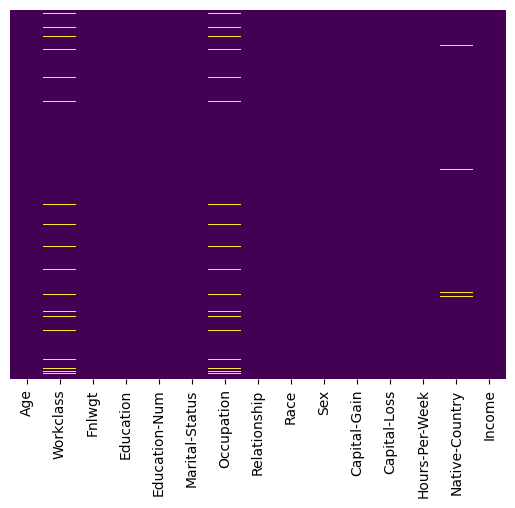

In [30]:
#Plot the null values in a heatmap

sns.heatmap(adultData.isnull(), yticklabels=False, cbar=False, cmap='viridis');

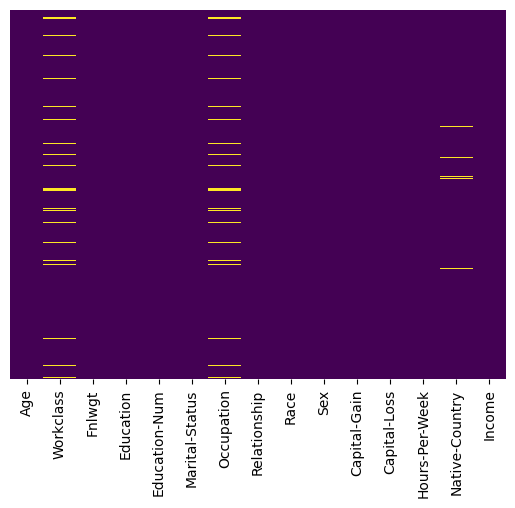

In [32]:
#heatmap of test set

sns.heatmap(adultTest.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [36]:
# Get the data types or relevant info of test set 

# adultTest.dtypes
adultTest.info() #we have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       15318 non-null  object
 2   Fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-Num   16281 non-null  int64 
 5   Marital-Status  16281 non-null  object
 6   Occupation      15315 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-Gain    16281 non-null  int64 
 11  Capital-Loss    16281 non-null  int64 
 12  Hours-Per-Week  16281 non-null  int64 
 13  Native-Country  16007 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [38]:
#FEATURE CREATION
adultData["Is_Married"] = adultData["Marital-Status"].apply(lambda x: 1 if "Married" in x else 0)
adultTest["Is_Married"] = adultTest["Marital-Status"].apply(lambda x: 1 if "Married" in x else 0)


In [40]:
def simplify_occupation(occ):
    if occ in ["Exec-managerial", "Prof-specialty"]:
        return "High-skill"
    elif occ in ["Handlers-cleaners", "Machine-op-inspct", "Craft-repair"]:
        return "Blue-collar"
    else:
        return "Other"

adultData["Occupation_Simplified"] = adultData["Occupation"].str.strip().apply(simplify_occupation)
adultTest["Occupation_Simplified"] = adultTest["Occupation"].str.strip().apply(simplify_occupation)

In [42]:
adultData["Is_White"] = adultData["Race"].str.strip().apply(lambda x: 1 if x == "White" else 0)
adultTest["Is_White"] = adultTest["Race"].str.strip().apply(lambda x: 1 if x == "White" else 0)

adultData["Is_Male"] = adultData["Sex"].str.strip().apply(lambda x: 1 if x == "Male" else 0)
adultTest["Is_Male"] = adultTest["Sex"].str.strip().apply(lambda x: 1 if x == "Male" else 0)

In [44]:
# Drop the unnecessary features 
 
adultData = adultData.drop(["Fnlwgt", "Education","Sex","Race","Occupation"], axis=1)
adultTest = adultTest.drop(["Fnlwgt", "Education","Sex","Race","Occupation"], axis=1)

In [46]:
adultData.head()


,Age,Workclass,Education-Num,Marital-Status,Relationship,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Is_Married,Occupation_Simplified,Is_White,Is_Male
0,39,State-gov,13,Never-married,Not-in-family,2174,0,40,United-States,<=50K,0,Other,1,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Husband,0,0,13,United-States,<=50K,1,High-skill,1,1
2,38,Private,9,Divorced,Not-in-family,0,0,40,United-States,<=50K,0,Blue-collar,1,1
3,53,Private,7,Married-civ-spouse,Husband,0,0,40,United-States,<=50K,1,Blue-collar,0,1
4,28,Private,13,Married-civ-spouse,Wife,0,0,40,Cuba,<=50K,1,High-skill,0,0


In [48]:
adultTest.head()

,Age,Workclass,Education-Num,Marital-Status,Relationship,Capital-Gain,Capital-Loss,Hours-Per-Week,Native-Country,Income,Is_Married,Occupation_Simplified,Is_White,Is_Male
0,25,Private,7,Never-married,Own-child,0,0,40,United-States,<=50K.,0,Blue-collar,0,1
1,38,Private,9,Married-civ-spouse,Husband,0,0,50,United-States,<=50K.,1,Other,1,1
2,28,Local-gov,12,Married-civ-spouse,Husband,0,0,40,United-States,>50K.,1,Other,1,1
3,44,Private,10,Married-civ-spouse,Husband,7688,0,40,United-States,>50K.,1,Blue-collar,0,1
4,18,NaN,10,Never-married,Own-child,0,0,30,United-States,<=50K.,0,Other,1,0


In [50]:
# Check the summary statistics   
sum_stats = adultData.describe()
sum_stats

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male
count,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00,32537.00
mean,38.59,10.08,1078.44,87.37,40.44,0.47,0.85,0.67
std,13.64,2.57,7387.96,403.10,12.35,0.50,0.35,0.47
min,17.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,28.00,9.00,0.00,0.00,40.00,0.00,1.00,0.00
50%,37.00,10.00,0.00,0.00,40.00,0.00,1.00,1.00
75%,48.00,12.00,0.00,0.00,45.00,1.00,1.00,1.00
max,90.00,16.00,99999.00,4356.00,99.00,1.00,1.00,1.00


In [52]:
# may have outliers in capital-gain and capital-loss 
#Also, we can see that the 47% of individuals are married, 85% are white, 67% are male.

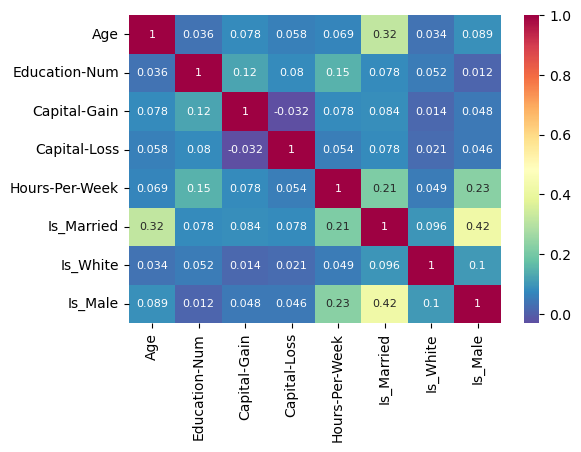

In [54]:
# Calculate the Pearson correlation coefficients of adult data  
corr_matrix = adultData.select_dtypes('number').corr()

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");

plt.show()

In [56]:
# there is a moderate positive (weak, r = 0.3/ strong, r=0.8)correlation between 'is male' and 'is married'. 
#this indicates that as the value of one increase, the other also increase

In [58]:
# Split to X and Y  
# x independent and y dependent
X = adultData.drop('Income', axis = 1)
y = adultData['Income']

print("X dimensions:",X.shape,"\n","y dimensions:",y.shape)

X dimensions: (32537, 13) 
 y dimensions: (32537,)


In [60]:
# Get the class frequencies/counts of the target variable from your adultData in a tabular format 
y.value_counts()

Income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [62]:
# we have an imbalance in our dependent variable.
# This is not good for our models, because this tends to affect the generalization capability of our models.

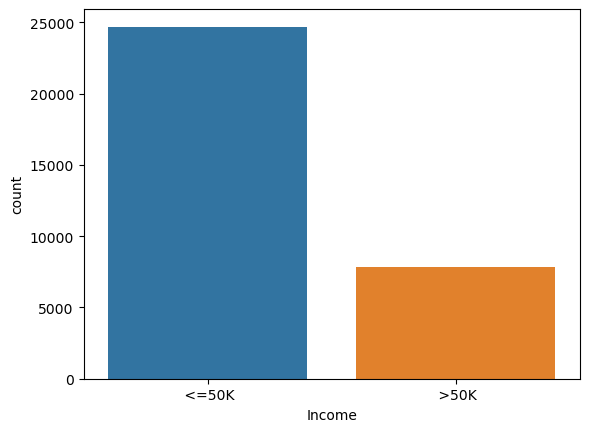

In [64]:
# Visualize the class frequencies/counts of the target variable 
sns.countplot(x='Income',hue='Income', data=adultData)
plt.show();

In [66]:
#we use the label endoder to convert the categorical variables into numerical.
le = LabelEncoder()
y = le.fit_transform(y) # with fit_transform will make the transformation (with values 0 and 1).
#This is the classification that our models will have to do later.

y #<=50k = 0 , >50k = 1

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=0)

print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape)

Shape of x_train and y_train:  (22775, 13) (22775,)
Shape of x_test and y_test:  (9762, 13) (9762,)


In [70]:
# the validation technique is important because it ensures that models generalize well to unseen data. 
#in this case i set Stratify=y because it is crucial when dealing with imbalanced datasets, 
#stratification ensures the same distribution in both the training and test sets.

In [78]:
#sanity check: print the NAs per train/test dataset before the imputing
print("Nulls in X_train","-"*20)
print(X_train.isnull().sum())

print("Nulls in X_test","-"*20)
print(X_test.isnull().sum())

print("Nulls in adultTest","-"*20)
print(adultTest.isnull().sum())

Nulls in X_train --------------------
Age                         0
Workclass                1259
Education-Num               0
Marital-Status              0
Relationship                0
Capital-Gain                0
Capital-Loss                0
Hours-Per-Week              0
Native-Country            413
Is_Married                  0
Occupation_Simplified       0
Is_White                    0
Is_Male                     0
dtype: int64
Nulls in X_test --------------------
Age                        0
Workclass                577
Education-Num              0
Marital-Status             0
Relationship               0
Capital-Gain               0
Capital-Loss               0
Hours-Per-Week             0
Native-Country           169
Is_Married                 0
Occupation_Simplified      0
Is_White                   0
Is_Male                    0
dtype: int64
Nulls in adultTest --------------------
Age                        0
Workclass                963
Education-Num              0
Marit

In [74]:
# we have missing values so we need the imputing

In [76]:
#since our missing values are only in the categorical features we will need only one imputer for them

In [80]:
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [84]:
X_train[['Workclass', 'Native-Country']]     = imp_cat.fit_transform(X_train[['Workclass', 'Native-Country']])
X_test[['Workclass', 'Native-Country']]      = imp_cat.transform(X_test[['Workclass', 'Native-Country']])
adultTest[['Workclass', 'Native-Country']] = imp_cat.transform(adultTest[['Workclass', 'Native-Country']])

In [86]:
#print once more for sanity check
print("Nulls in X_train","-"*20)
print(X_train.isnull().sum())

print("Nulls in X_test","-"*20)
print(X_test.isnull().sum())

print("Nulls in adultTest","-"*20)
print(adultTest.isnull().sum())

Nulls in X_train --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain             0
Capital-Loss             0
Hours-Per-Week           0
Native-Country           0
Is_Married               0
Occupation_Simplified    0
Is_White                 0
Is_Male                  0
dtype: int64
Nulls in X_test --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain             0
Capital-Loss             0
Hours-Per-Week           0
Native-Country           0
Is_Married               0
Occupation_Simplified    0
Is_White                 0
Is_Male                  0
dtype: int64
Nulls in adultTest --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain          

In [88]:
#print the data types 
print(X_train.dtypes)
print(X_test.dtypes)

Age                       int64
Workclass                object
Education-Num             int64
Marital-Status           object
Relationship             object
Capital-Gain              int64
Capital-Loss              int64
Hours-Per-Week            int64
Native-Country           object
Is_Married                int64
Occupation_Simplified    object
Is_White                  int64
Is_Male                   int64
dtype: object
Age                       int64
Workclass                object
Education-Num             int64
Marital-Status           object
Relationship             object
Capital-Gain              int64
Capital-Loss              int64
Hours-Per-Week            int64
Native-Country           object
Is_Married                int64
Occupation_Simplified    object
Is_White                  int64
Is_Male                   int64
dtype: object


In [90]:
# Encode the categorical features with One Hot Encoding (zeros and ones).
X_train_ohe = X_train[['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified']]
X_train_ohe = pd.get_dummies(X_train_ohe, dtype=int)

X_train = X_train.drop(['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified'], axis = 1)
X_train = X_train.join(X_train_ohe)

X_train.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital-Status_ Divorced,Marital-Status_ Married-AF-spouse,Marital-Status_ Married-civ-spouse,Marital-Status_ Married-spouse-absent,Marital-Status_ Never-married,Marital-Status_ Separated,Marital-Status_ Widowed,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native-Country_ Cambodia,Native-Country_ Canada,Native-Country_ China,Native-Country_ Columbia,Native-Country_ Cuba,Native-Country_ Dominican-Republic,Native-Country_ Ecuador,Native-Country_ El-Salvador,Native-Country_ England,Native-Country_ France,Native-Country_ Germany,Native-Country_ Greece,Native-Country_ Guatemala,Native-Country_ Haiti,Native-Country_ Holand-Netherlands,Native-Country_ Honduras,Native-Country_ Hong,Native-Country_ Hungary,Native-Country_ India,Native-Country_ Iran,Native-Country_ Ireland,Native-Country_ Italy,Native-Country_ Jamaica,Native-Country_ Japan,Native-Country_ Laos,Native-Country_ Mexico,Native-Country_ Nicaragua,Native-Country_ Outlying-US(Guam-USVI-etc),Native-Country_ Peru,Native-Country_ Philippines,Native-Country_ Poland,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Occupation_Simplified_Blue-collar,Occupation_Simplified_High-skill,Occupation_Simplified_Other
17365,30,9,0,0,45,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
380,54,9,0,0,40,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
28968,29,4,0,0,55,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3476,18,7,0,0,35,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
25333,42,5,0,0,40,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [92]:
# apply ohe to the X_test set
X_test_ohe = X_test[['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified']]
X_test_ohe = pd.get_dummies(X_test_ohe, dtype=int)

X_test = X_test.drop(['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified'], axis = 1)
X_test = X_test.join(X_test_ohe)

X_test.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital-Status_ Divorced,Marital-Status_ Married-AF-spouse,Marital-Status_ Married-civ-spouse,Marital-Status_ Married-spouse-absent,Marital-Status_ Never-married,Marital-Status_ Separated,Marital-Status_ Widowed,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native-Country_ Cambodia,Native-Country_ Canada,Native-Country_ China,Native-Country_ Columbia,Native-Country_ Cuba,Native-Country_ Dominican-Republic,Native-Country_ Ecuador,Native-Country_ El-Salvador,Native-Country_ England,Native-Country_ France,Native-Country_ Germany,Native-Country_ Greece,Native-Country_ Guatemala,Native-Country_ Haiti,Native-Country_ Honduras,Native-Country_ Hong,Native-Country_ Hungary,Native-Country_ India,Native-Country_ Iran,Native-Country_ Ireland,Native-Country_ Italy,Native-Country_ Jamaica,Native-Country_ Japan,Native-Country_ Laos,Native-Country_ Mexico,Native-Country_ Nicaragua,Native-Country_ Outlying-US(Guam-USVI-etc),Native-Country_ Peru,Native-Country_ Philippines,Native-Country_ Poland,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Occupation_Simplified_Blue-collar,Occupation_Simplified_High-skill,Occupation_Simplified_Other
6533,35,14,13550,0,55,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
6444,51,9,0,0,38,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
27909,27,9,0,0,40,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
17046,56,10,0,0,40,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
27573,50,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [94]:
#because we had a problem in scaling with different num of columns, we used reindex to align the columns of a DataFrame
# Ensure test_df has the same columns as train_df
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

C:\Users\vaspi\AppData\Local\Temp\ipykernel_12504\487307000.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


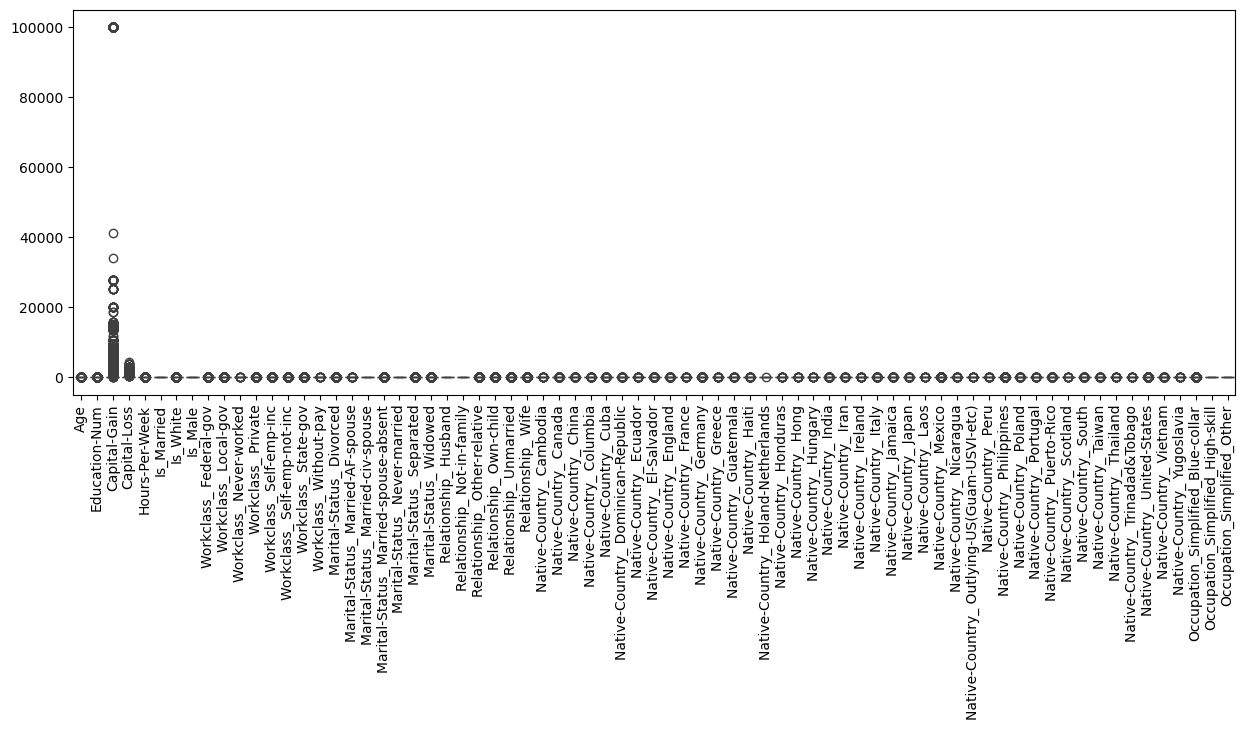

In [96]:
#check the distributions
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [97]:
#apply scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

C:\Users\vaspi\AppData\Local\Temp\ipykernel_12504\47019253.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


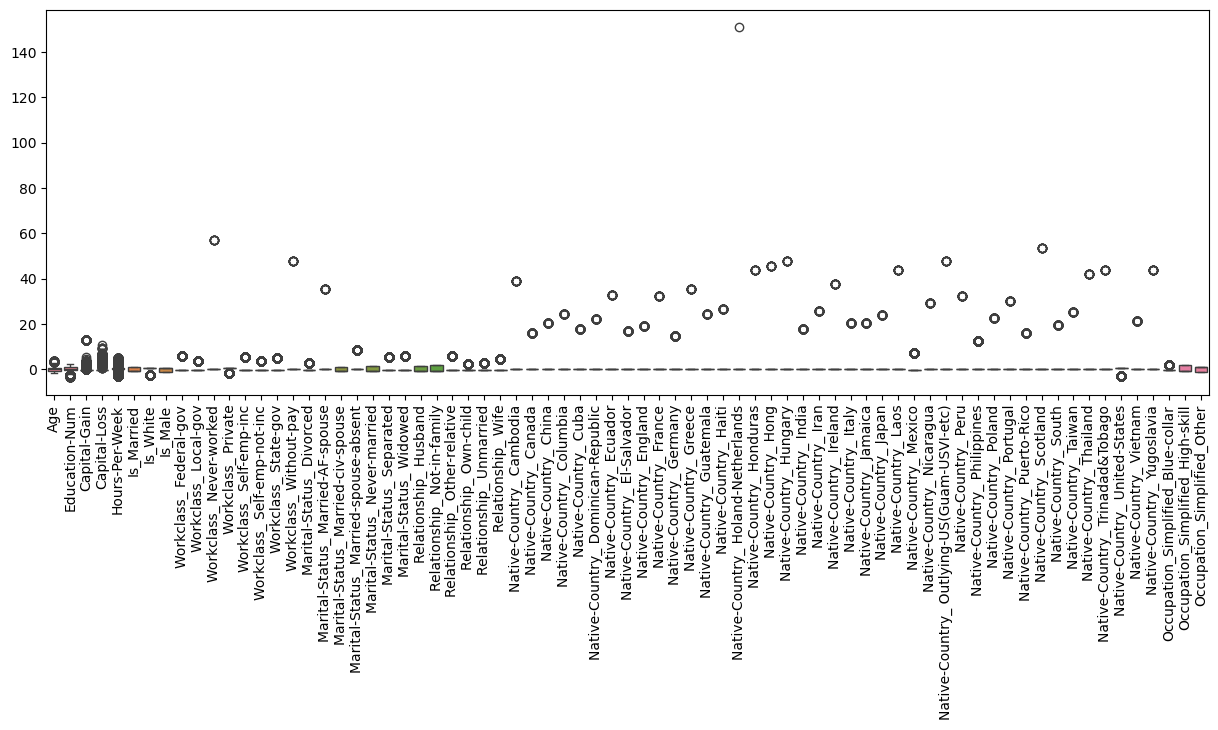

In [98]:
#boxplot
plt.figure(figsize=(15,5))
ax = sns.boxplot(data= X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [102]:
#CLASSIFIERS

In [104]:
# Create an empty DataFrame to store and compare all evaluation metrics across all classifiers 

clf_results = pd.DataFrame([])

In [106]:
#RF classifier
rf = RandomForestClassifier(random_state=0) # # Default parameters of RFs = n_estimators=100,criterion=”gini”...
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(round(metrics.accuracy_score(y_test,y_pred_rf),3))
print(metrics.confusion_matrix(y_test,y_pred_rf))
print(metrics.classification_report(y_test,y_pred_rf))

0.846
[[6835  575]
 [ 925 1427]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7410
           1       0.71      0.61      0.66      2352

    accuracy                           0.85      9762
   macro avg       0.80      0.76      0.78      9762
weighted avg       0.84      0.85      0.84      9762



In [108]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'RF', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf), 3)})])
clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66


In [110]:
#SVM
svc = SVC() #Default parameters -> C=1.0, gamma = 'auto', kernel='rbf'
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

print(round(metrics.accuracy_score(y_test,y_pred_svc),3))
print(metrics.confusion_matrix(y_test,y_pred_svc))
print(metrics.classification_report(y_test,y_pred_svc))


0.847
[[6976  434]
 [1056 1296]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.75      0.55      0.63      2352

    accuracy                           0.85      9762
   macro avg       0.81      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762



In [111]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc), 3)})])
clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64


In [112]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

print(round(metrics.accuracy_score(y_test,y_pred_knn),3))
print(metrics.confusion_matrix(y_test,y_pred_knn))
print(metrics.classification_report(y_test,y_pred_knn))

0.835
[[6774  636]
 [ 978 1374]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7410
           1       0.68      0.58      0.63      2352

    accuracy                           0.83      9762
   macro avg       0.78      0.75      0.76      9762
weighted avg       0.83      0.83      0.83      9762



In [113]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'KNN', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn), 3)})])
clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63


In [114]:
# Train XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb.predict(X_test)
print(round(metrics.accuracy_score(y_test,y_pred_xgb),3))
print(metrics.confusion_matrix(y_test,y_pred_xgb))
print(metrics.classification_report(y_test,y_pred_xgb))

0.867
[[6978  432]
 [ 867 1485]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7410
           1       0.77      0.63      0.70      2352

    accuracy                           0.87      9762
   macro avg       0.83      0.79      0.81      9762
weighted avg       0.86      0.87      0.86      9762



In [115]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'XGBoost', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_xgb), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_xgb), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70


In [116]:
# Train Logistic Regression
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

# Predict and evaluate
y_pred_logR = logisticReg.predict(X_test)

print(round(metrics.accuracy_score(y_test,y_pred_logR),3))
print(metrics.confusion_matrix(y_test,y_pred_logR))
print(metrics.classification_report(y_test,y_pred_logR))

0.846
[[6930  480]
 [1020 1332]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.74      0.57      0.64      2352

    accuracy                           0.85      9762
   macro avg       0.80      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762



In [117]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Logistic Reg', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_logR), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_logR), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64


In [118]:
#Log reg tuning
# Define the parameter grid
param_grid = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 300, 500]
}

logrCV = RandomizedSearchCV(
    LogisticRegression(), param_distributions=param_grid, 
    n_iter=20, scoring='accuracy', 
    cv=5, n_jobs=-1, random_state=0
)

logrCV.fit(X_train, y_train)
print("Best Parameters:", logrCV.best_params_)

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 0.1}


C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [119]:
# the optimal LogisticReg model selection as detected by RandomizedSearchCV  

logr_opt = logrCV.best_estimator_
logr_opt.fit(X_train,y_train)
y_pred_logr_opt = logr_opt.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_logr_opt))
print(metrics.confusion_matrix(y_test,y_pred_logr_opt))
print(metrics.classification_report(y_test,y_pred_logr_opt))

0.8468551526326572
[[6934  476]
 [1019 1333]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7410
           1       0.74      0.57      0.64      2352

    accuracy                           0.85      9762
   macro avg       0.80      0.75      0.77      9762
weighted avg       0.84      0.85      0.84      9762



C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [120]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned Logistic Reg', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_logr_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_logr_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64
0,Tuned Logistic Reg,0.85,0.64


In [121]:
#tune xgboost
param_dist = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [3, 5, 7, 10],  # Tree depth (controls overfitting)
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Step size for updates
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples per tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features per tree
}


randomXGB = RandomizedSearchCV(XGBClassifier(), param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=0)
randomXGB.fit(X_train, y_train)
print(randomXGB.best_params_)

{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [122]:
# the optimal XGBoost model selection as detected by RandomizedSearchCV  

xgb_opt = randomXGB.best_estimator_
xgb_opt.fit(X_train,y_train)
y_pred_xgb_opt = xgb_opt.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_xgb_opt))
print(metrics.confusion_matrix(y_test,y_pred_xgb_opt))
print(metrics.classification_report(y_test,y_pred_xgb_opt))

0.8675476336816226
[[7024  386]
 [ 907 1445]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      7410
           1       0.79      0.61      0.69      2352

    accuracy                           0.87      9762
   macro avg       0.84      0.78      0.80      9762
weighted avg       0.86      0.87      0.86      9762



In [123]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned XGBoost', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_xgb_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_xgb_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64
0,Tuned Logistic Reg,0.85,0.64
0,Tuned XGBoost,0.87,0.69


In [125]:
#Tuned RF
param_grid_rf = {'n_estimators': np.arange(10, 200, 10),
              'max_depth': [np.arange(1, 50, 2), None],
              'max_features' : ['sqrt', 'log2', None], 
              'min_samples_split': [1, 3, 5], 
              'min_samples_leaf': [1, 3, 10],
              'criterion': ['gini', 'entropy'], 
             }

cv_rf = RandomizedSearchCV(RandomForestClassifier(random_state=0), 
                           param_distributions=param_grid_rf, 
                           n_iter = 30,
                           cv = 5,
                           n_jobs = -1,
                           random_state=0
                            )

cv_rf.fit(X_train, y_train)
print(cv_rf.best_params_)

C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
80 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\vaspi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\vaspi\anaconda3\Lib\site-packages

{'n_estimators': 110, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


In [126]:
# the optimal RF model selection as detected by RandomizedSearchCV  

rf_opt = cv_rf.best_estimator_
rf_opt.fit(X_train,y_train)
y_pred_rf_opt = rf_opt.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_rf_opt))
print(metrics.confusion_matrix(y_test,y_pred_rf_opt))
print(metrics.classification_report(y_test,y_pred_rf_opt)) 

0.860479409956976
[[7071  339]
 [1023 1329]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      7410
           1       0.80      0.57      0.66      2352

    accuracy                           0.86      9762
   macro avg       0.84      0.76      0.79      9762
weighted avg       0.86      0.86      0.85      9762



In [127]:
#accuracy increased from 0.85 to 0.86

In [128]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned RF', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_rf_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_rf_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64
0,Tuned Logistic Reg,0.85,0.64
0,Tuned XGBoost,0.87,0.69
0,Tuned RF,0.86,0.66


C:\Users\vaspi\AppData\Local\Temp\ipykernel_12504\710395073.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(feature_scores.index, size = 20)


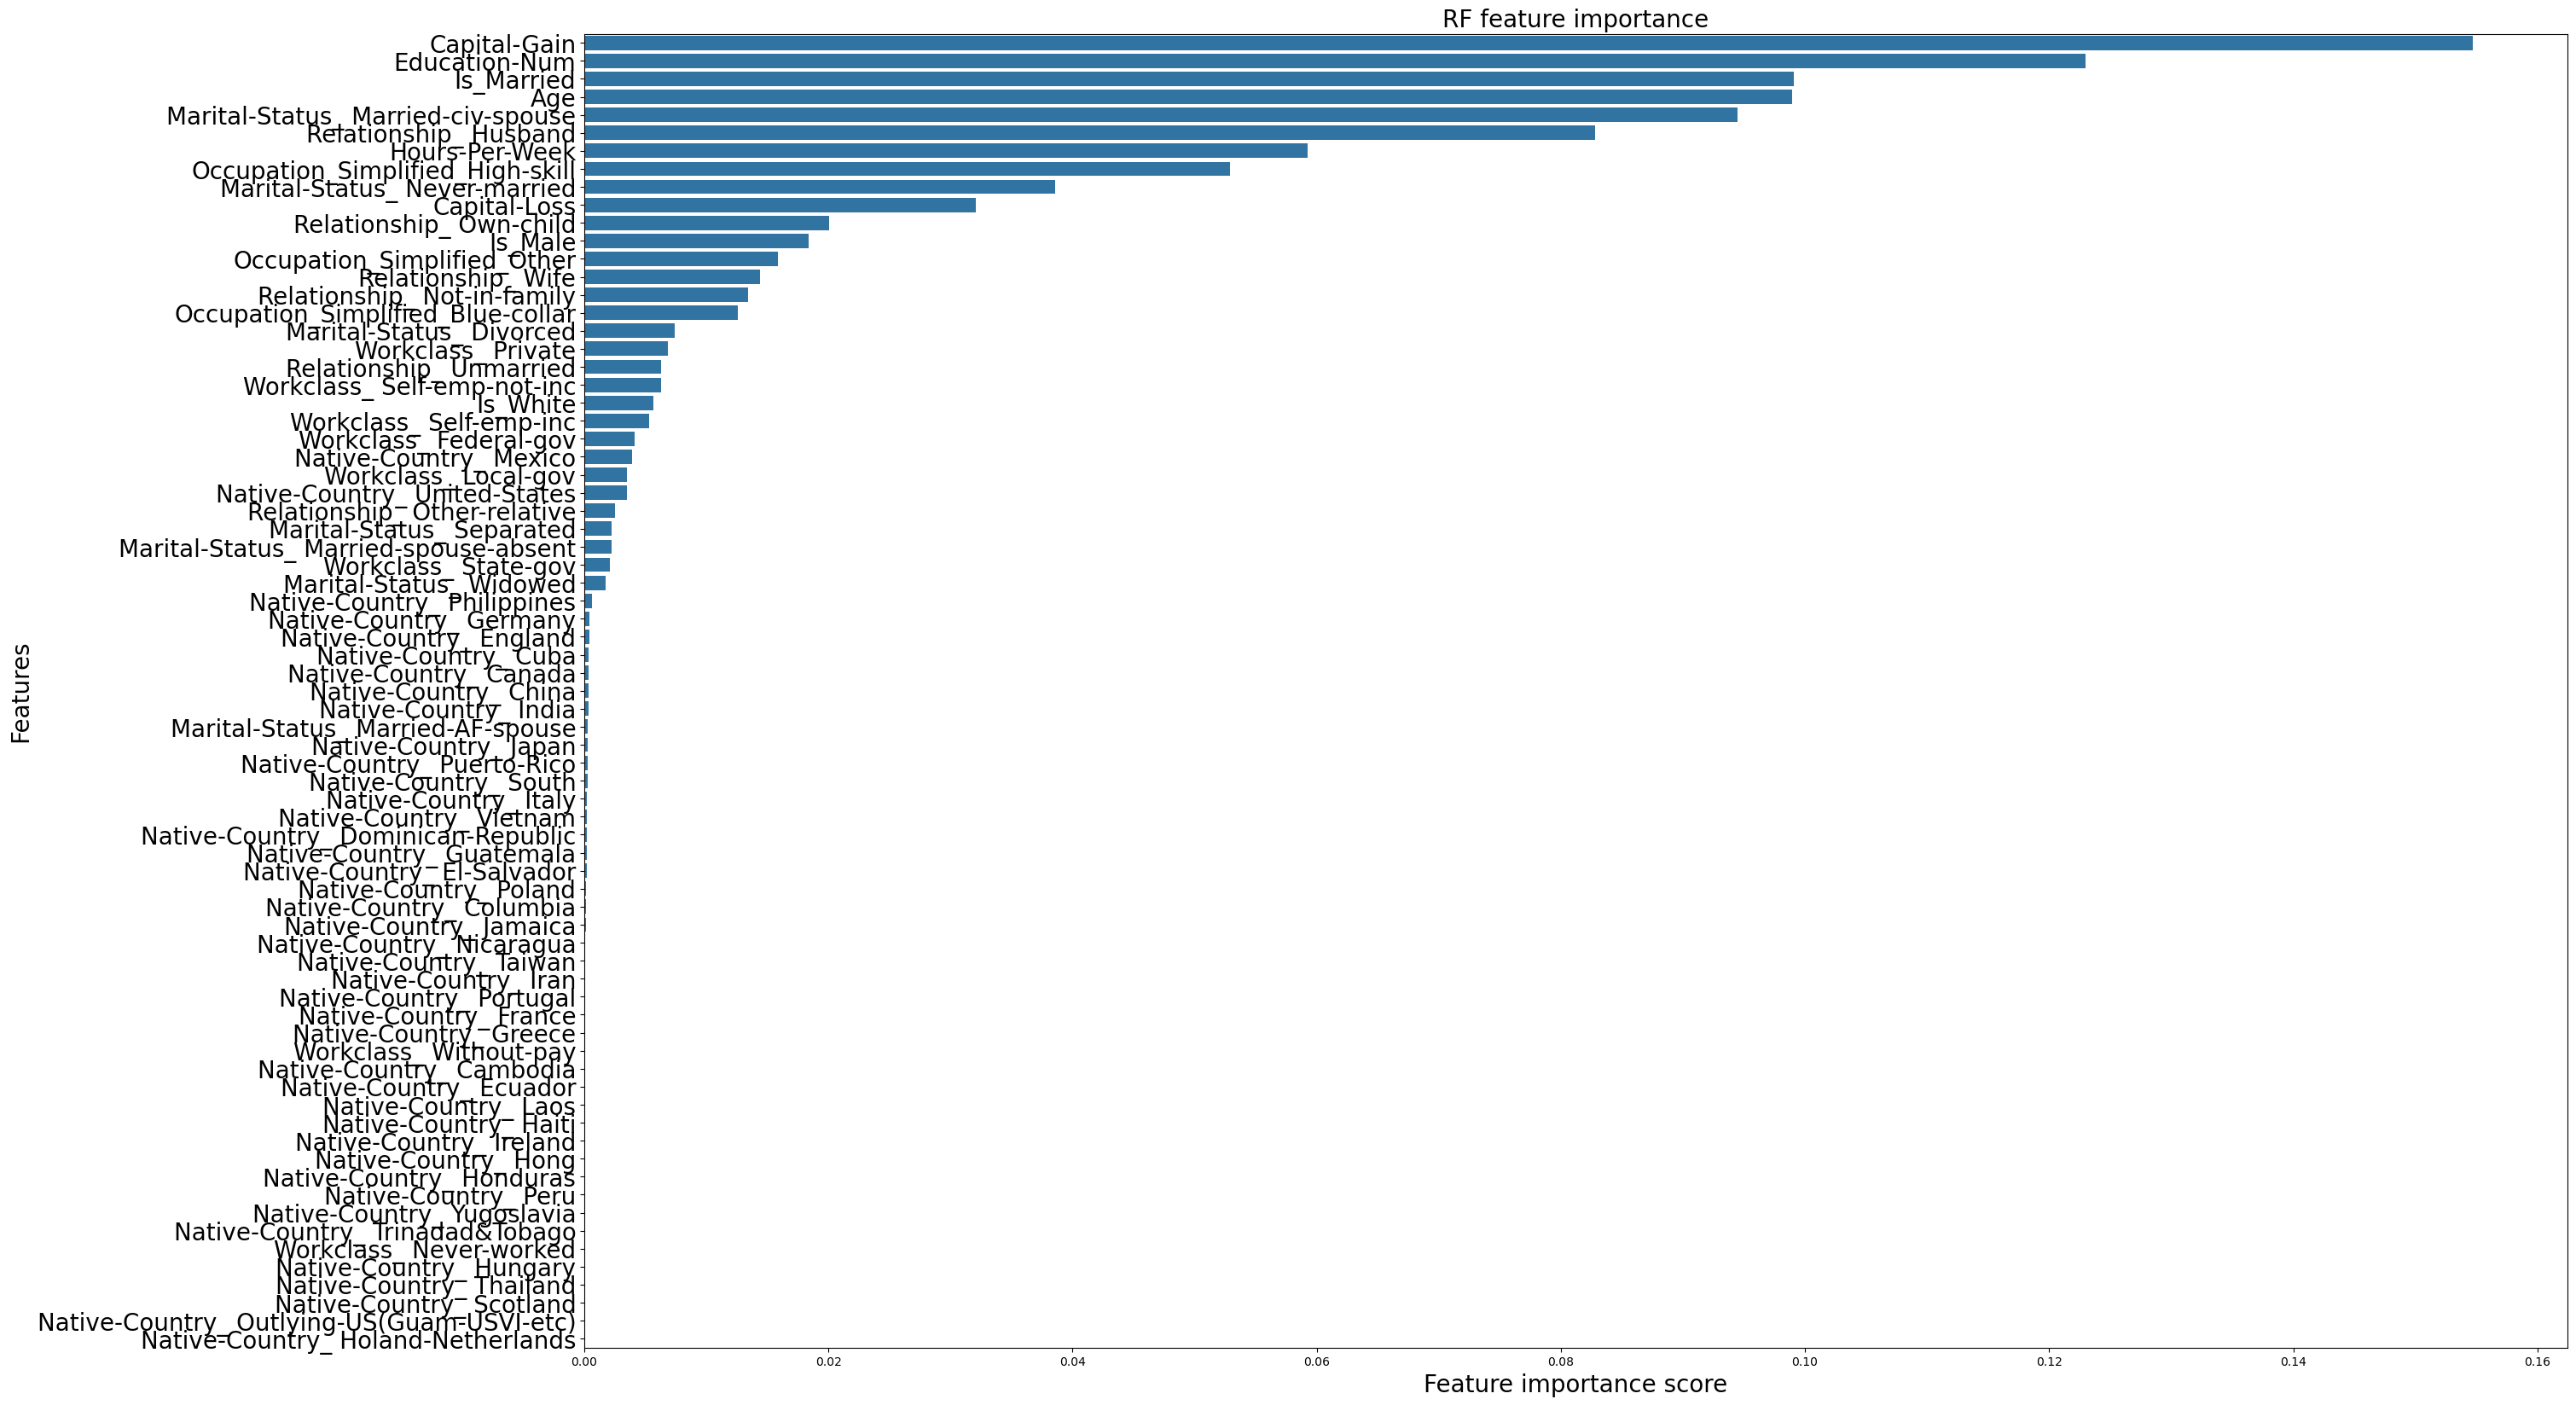

In [129]:
# Get the feature importance from the rf classifier
feature_scores = pd.DataFrame(rf_opt.feature_importances_, 
                              index=X_train.columns, 
                              columns=['Importance'])

feature_scores.sort_values(by='Importance', ascending=False, inplace=True) 

 
f, ax = plt.subplots(figsize=(30, 20))
ax = sns.barplot(x='Importance', y=feature_scores.index, data=feature_scores)
ax.set_title("RF feature importance", size = 20)
ax.set_yticklabels(feature_scores.index, size = 20)
ax.set_xlabel("Feature importance score", size = 20)
ax.set_ylabel("Features", size = 20)
plt.show()

In [130]:
# Create the dictionary of model hyperparameters
n_neighbors = np.arange(1, 51, 5)  
weights     = ['uniform', 'distance']
metric      = ['minkowski','euclidean','manhattan']

# Convert to dictionary
knn_param_dist = dict(n_neighbors = n_neighbors, 
                      weights = weights, 
                      metric = metric
                     )


# Random search with 10-fold cross-validation using a dictionary of parameters
randomCV = RandomizedSearchCV(KNeighborsClassifier(), 
                      knn_param_dist, 
                      cv=10)
randomCV.fit(X_train, y_train) 

# Report the optimal parameters using
print('Best Parameters using grid search: ', randomCV.best_params_)

Best Parameters using grid search:  {'weights': 'uniform', 'n_neighbors': 31, 'metric': 'manhattan'}


In [131]:
# Build the classifier using the optimal parameters detected by grid search

knn_opt = randomCV.best_estimator_
knn_opt.fit(X_train, y_train)
y_pred_knn_opt = knn_opt.predict(X_test)

# Report the final overall accuracy
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_pred_knn_opt))

Test set accuracy:  0.8367137881581643


In [132]:
print(metrics.confusion_matrix(y_test,y_pred_knn_opt))
print(metrics.classification_report(y_test,y_pred_knn_opt))

[[6891  519]
 [1075 1277]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7410
           1       0.71      0.54      0.62      2352

    accuracy                           0.84      9762
   macro avg       0.79      0.74      0.76      9762
weighted avg       0.83      0.84      0.83      9762



In [133]:
#accuracy slightly increased

In [134]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned KNN', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_knn_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_knn_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64
0,Tuned Logistic Reg,0.85,0.64
0,Tuned XGBoost,0.87,0.69
0,Tuned RF,0.86,0.66
0,Tuned KNN,0.84,0.62


In [135]:
#Tuned SVM
param_grid = [ {'C':[0.1, 10], 'kernel':['linear']},
               {'C':[0.1, 10], 'kernel':['rbf'], 'gamma':[0.1, 0.01]},
               {'C':[0.1, 10], 'kernel':['poly'],'degree':[2] ,'gamma':[0.1, 0.01]}
             ]

randomS = RandomizedSearchCV(SVC(),
                        param_distributions=param_grid,
                        cv = 5,
                        scoring = 'accuracy',
                        n_jobs = -1,
                        random_state=0)

randomS.fit(X_train, y_train)
print(randomS.best_params_)

{'kernel': 'rbf', 'gamma': 0.01, 'C': 10}


In [136]:
#the optimal model selection as detected by RandomizedSearchCV for the svm classifier 
svc_opt = randomS.best_estimator_
svc_opt.fit(X_train,y_train)
y_pred_svc_opt = svc_opt.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred_svc_opt))
print(metrics.confusion_matrix(y_test,y_pred_svc_opt))
print(metrics.classification_report(y_test,y_pred_svc_opt))

0.8447039541077648
[[6925  485]
 [1031 1321]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      7410
           1       0.73      0.56      0.64      2352

    accuracy                           0.84      9762
   macro avg       0.80      0.75      0.77      9762
weighted avg       0.84      0.84      0.84      9762



In [137]:
clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Tuned SVM', 
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svc_opt), 3), 
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svc_opt), 3)})])

clf_results

,Model,Accuracy,F1
0,RF,0.85,0.66
0,SVM,0.85,0.64
0,KNN,0.83,0.63
0,XGBoost,0.87,0.70
0,Logistic Reg,0.85,0.64
0,Tuned Logistic Reg,0.85,0.64
0,Tuned XGBoost,0.87,0.69
0,Tuned RF,0.86,0.66
0,Tuned KNN,0.84,0.62
0,Tuned SVM,0.84,0.64


In [149]:
#model's comparison basedon the best F1 score
clf_results.sort_values(by='F1', ascending=False, inplace=True)
clf_results

,Model,Accuracy,F1
0,XGBoost,0.87,0.70
0,Tuned XGBoost,0.87,0.69
0,Tuned RF,0.86,0.66
0,RF,0.85,0.66
0,Tuned Logistic Reg,0.85,0.64
0,Logistic Reg,0.85,0.64
0,SVM,0.85,0.64
0,Tuned SVM,0.84,0.64
0,KNN,0.83,0.63
0,Tuned KNN,0.84,0.62


In [167]:
#EVALUATION
# Split to Xt and Yt  
Xt = adultTest.drop('Income', axis = 1)
yt = adultTest['Income']

print("X dimensions:",Xt.shape,"\n","y dimensions:",yt.shape)

X dimensions: (16281, 13) 
 y dimensions: (16281,)


In [169]:
#preprocess Xt
print("Nulls in Xt","-"*20)
print(Xt.isnull().sum())

Nulls in Xt --------------------
Age                      0
Workclass                0
Education-Num            0
Marital-Status           0
Relationship             0
Capital-Gain             0
Capital-Loss             0
Hours-Per-Week           0
Native-Country           0
Is_Married               0
Occupation_Simplified    0
Is_White                 0
Is_Male                  0
dtype: int64


In [171]:
Xt.dtypes

Age                       int64
Workclass                object
Education-Num             int64
Marital-Status           object
Relationship             object
Capital-Gain              int64
Capital-Loss              int64
Hours-Per-Week            int64
Native-Country           object
Is_Married                int64
Occupation_Simplified    object
Is_White                  int64
Is_Male                   int64
dtype: object

In [173]:
Xt_ohe = Xt[['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified']]
Xt_ohe = pd.get_dummies(Xt_ohe, dtype=int)

Xt = Xt.drop(['Workclass', 'Marital-Status','Relationship', 'Native-Country', 'Occupation_Simplified'], axis = 1)
Xt = Xt.join(Xt_ohe)

Xt.head()

,Age,Education-Num,Capital-Gain,Capital-Loss,Hours-Per-Week,Is_Married,Is_White,Is_Male,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Marital-Status_ Divorced,Marital-Status_ Married-AF-spouse,Marital-Status_ Married-civ-spouse,Marital-Status_ Married-spouse-absent,Marital-Status_ Never-married,Marital-Status_ Separated,Marital-Status_ Widowed,Relationship_ Husband,Relationship_ Not-in-family,Relationship_ Other-relative,Relationship_ Own-child,Relationship_ Unmarried,Relationship_ Wife,Native-Country_ Cambodia,Native-Country_ Canada,Native-Country_ China,Native-Country_ Columbia,Native-Country_ Cuba,Native-Country_ Dominican-Republic,Native-Country_ Ecuador,Native-Country_ El-Salvador,Native-Country_ England,Native-Country_ France,Native-Country_ Germany,Native-Country_ Greece,Native-Country_ Guatemala,Native-Country_ Haiti,Native-Country_ Honduras,Native-Country_ Hong,Native-Country_ Hungary,Native-Country_ India,Native-Country_ Iran,Native-Country_ Ireland,Native-Country_ Italy,Native-Country_ Jamaica,Native-Country_ Japan,Native-Country_ Laos,Native-Country_ Mexico,Native-Country_ Nicaragua,Native-Country_ Outlying-US(Guam-USVI-etc),Native-Country_ Peru,Native-Country_ Philippines,Native-Country_ Poland,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia,Occupation_Simplified_Blue-collar,Occupation_Simplified_High-skill,Occupation_Simplified_Other
0,25,7,0,0,40,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,0,0,50,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,28,12,0,0,40,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,44,10,7688,0,40,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,18,10,0,0,30,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [175]:
Xt = Xt.reindex(columns=X_train.columns, fill_value=0)

In [177]:
scaler = StandardScaler()
Xt = pd.DataFrame(scaler.fit_transform(Xt), columns=Xt.columns)

C:\Users\vaspi\AppData\Local\Temp\ipykernel_12504\2033426737.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


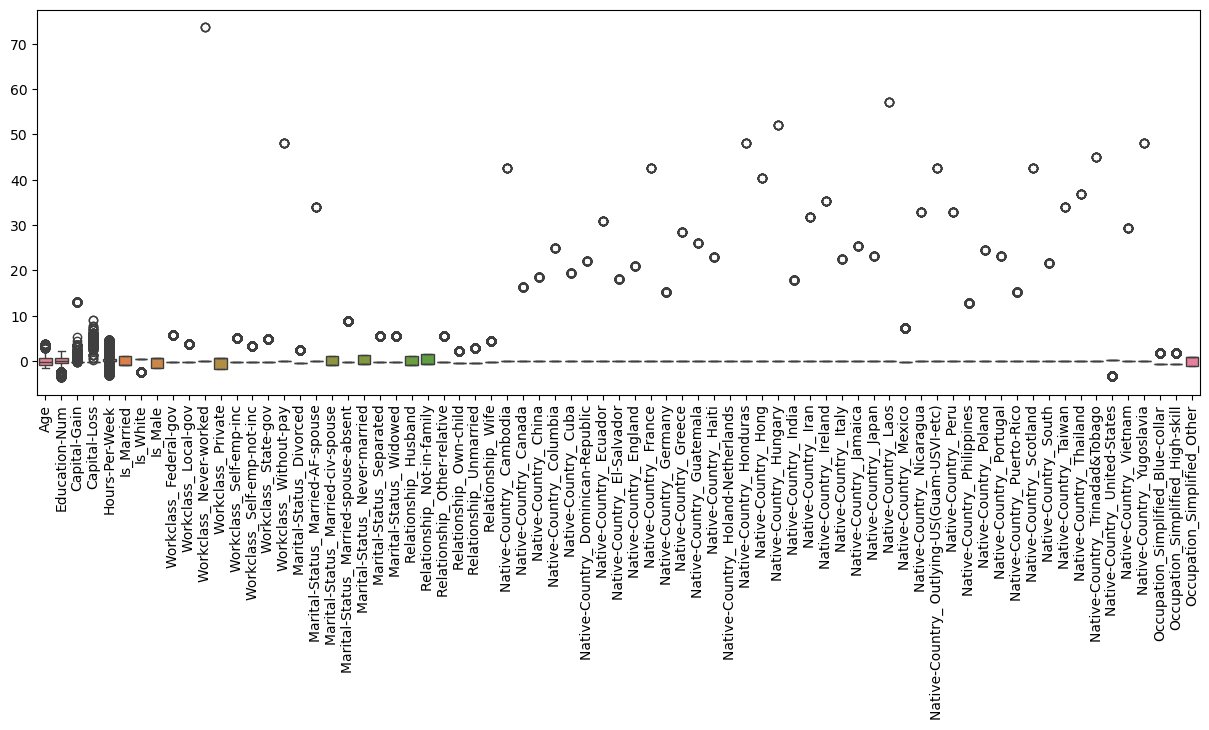

In [179]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data= Xt)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [180]:
#we use the label endoder to convert the categorical variables into numerical.
le = LabelEncoder()
yt = le.fit_transform(yt) # with fit_transform will make the transformation (with values 0 and 1).
#This is the classification that our models will have to do later.

yt #<=50k = 0 , >50k = 1

array([0, 0, 1, ..., 0, 0, 1])

In [183]:
#best model
y_pred_bm = xgb.predict(Xt)
print(metrics.accuracy_score(yt,y_pred_bm))
print(metrics.confusion_matrix(yt,y_pred_bm))
print(metrics.classification_report(yt,y_pred_bm))

0.8633990541121552
[[11998   437]
 [ 1787  2059]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     12435
           1       0.82      0.54      0.65      3846

    accuracy                           0.86     16281
   macro avg       0.85      0.75      0.78     16281
weighted avg       0.86      0.86      0.85     16281



In [ ]:
# we found accuracy 0.86 and F1 score equals to 0.65 which means that our model does a decent job identifying the high-income
#but of course there is still a room for improvement.

In [ ]:
# Shap feature explainabilityy

In [185]:
xgb = randomXGB.best_estimator_
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [187]:
y_pred_xgb = xgb.predict(X_test, output_margin=True)

explainer = shap.TreeExplainer(xgb)
explanation = explainer(X_test)

shap_values = explanation.values
# make sure the SHAP values add up to marginal predictions
np.abs(shap_values.sum(axis=1) + explanation.base_values - y_pred_xgb).max()


7.1525574e-06

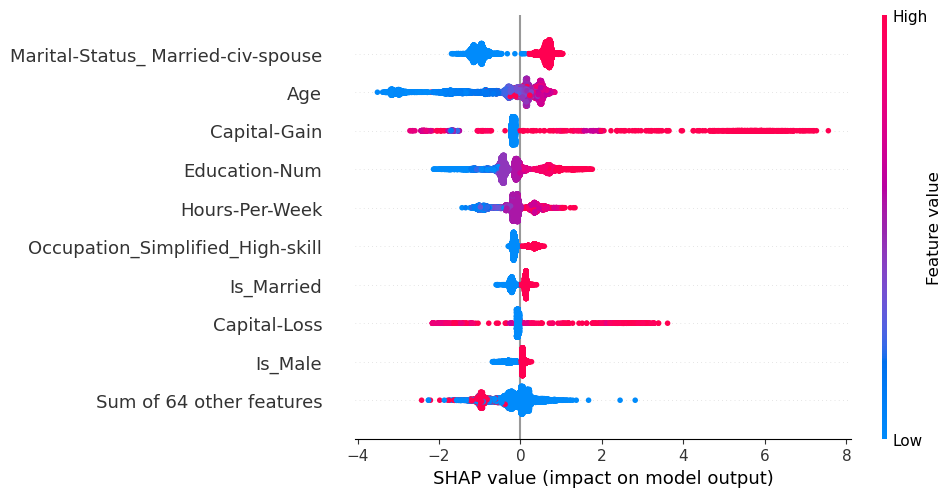

In [189]:
shap.plots.beeswarm(explanation)